In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
def sample_WS_graphs_on_p(num_graphs, n, k=4):
    clustering, mean_geo_dis = [], []
    p_range = np.arange(0, 1, 1/num_graphs)
    for p in p_range:
        G = nx.watts_strogatz_graph(n, k, p)
        clustering.append(nx.average_clustering(G))
        mean_geo_dis.append(nx.average_shortest_path_length(G))
        
    clustering = np.divide(clustering, max(clustering))
    mean_geo_dis = np.divide(mean_geo_dis, max(mean_geo_dis))
        
    data = pd.concat([pd.Series(clustering), pd.Series(mean_geo_dis)], axis = 1)
    
    data.rename(columns = {0: 'clustering', 1:'mean geo dist'}, inplace = True)
    sns.lineplot(data = data)
    plt.show()

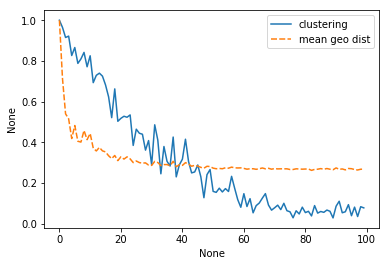

In [5]:
sample_WS_graphs_on_p(100, 100)

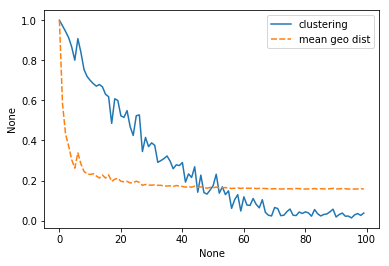

In [7]:
sample_WS_graphs_on_p(100, 200)

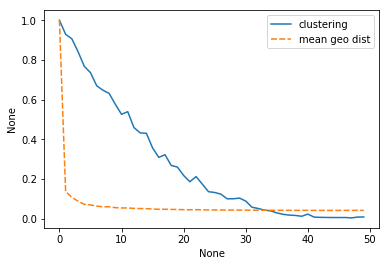

In [8]:
sample_WS_graphs_on_p(50, 1000)

We observe that the mean geodesic distance drops immediately for higher values on p (as x increases, p increases from 0 to 1) and then abruptly levels out. The higher the value of N, the smaller the distance it levels out on. Moreover, clustering also drops more significantly with higher values of Ns but the trend of normalized clustering staying over normalized mean geodesic distance remains (except for really high values of p).

In [9]:
def sample_WS_graphs(num_graphs, n, k=4, p=0.5):
    clustering, mean_geo_dis = [], []

    for _ in range(num_graphs):
        G = nx.watts_strogatz_graph(n, k, p)
        clustering.append(nx.average_clustering(G))
        mean_geo_dis.append(nx.average_shortest_path_length(G))
    
    fig, axes = plt.subplots(1,2, figsize=(16,8))
    sns.kdeplot(ax=axes[0], x=clustering, fill=True)
    axes[0].set(xlabel="Clustering")
    sns.kdeplot(ax=axes[1], x=mean_geo_dis, fill=True)
    axes[1].set(xlabel="Mean Geodesic Distance")
    plt.show()

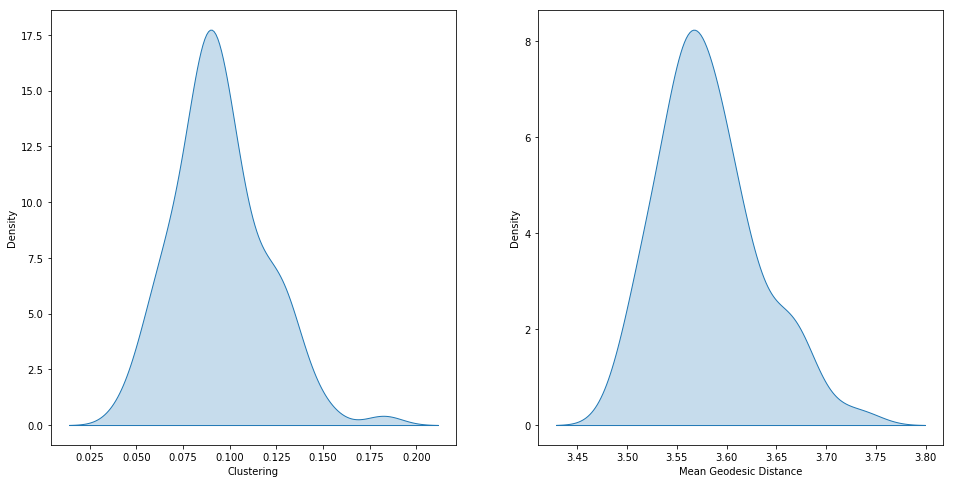

In [10]:
sample_WS_graphs(100, 100)

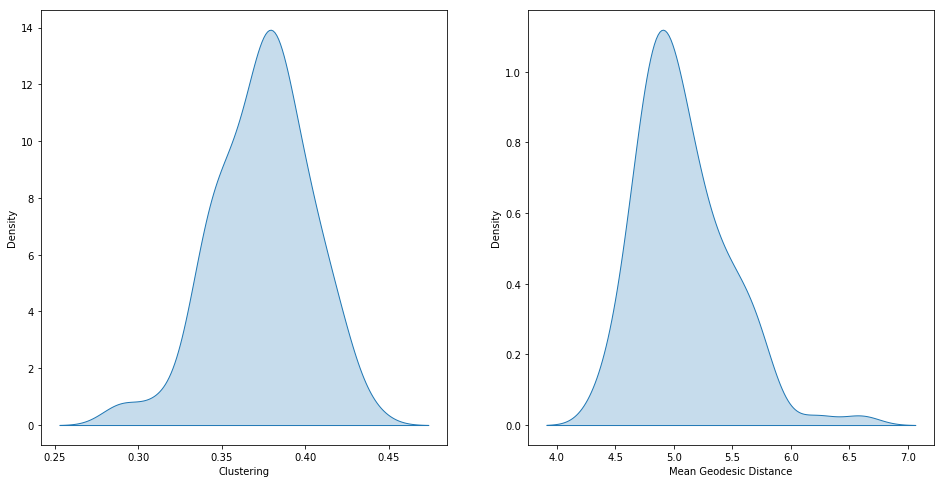

In [11]:
sample_WS_graphs(100, 100, p=0.1)

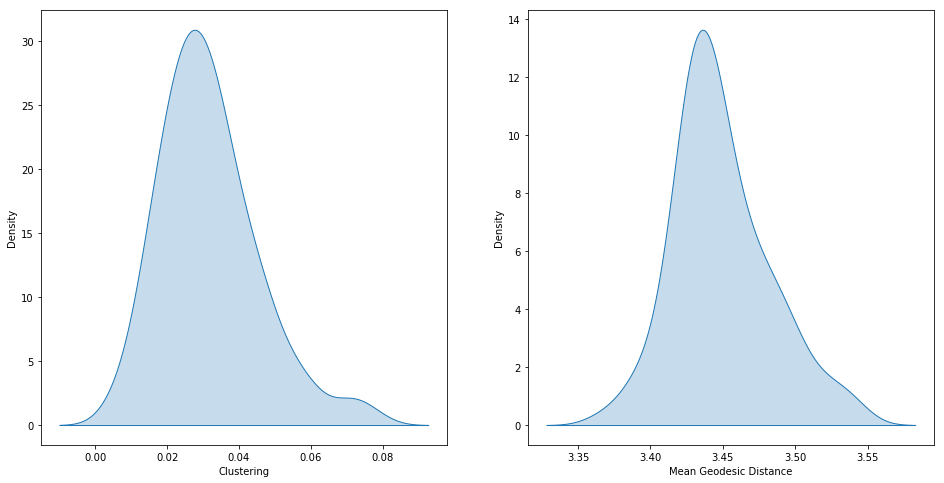

In [12]:
sample_WS_graphs(100, 100, p=0.9)

Above we observe sample means for clustering and mean geodesic distance for particular realizations of networks for given values of p. An interesting note is that the mean geodesic distance seems to be a slightly right-tailed distribution for every value of p we check. The curve resembles a normal distribution centered around the true value as expected.